In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# 6.8

`Describe a nonexperimental research situation—real or contrived—in which failure to control statistically for an omitted variable induces a correlation between the error and an explanatory variable, producing erroneous conclusions. (For example: An educational researcher discovers that university students who study more get lower grades on average; the researcher concludes that studying has an adverse effect on students’ grades.)`

A classic example in research, often cited by those with not so great intentions, is the use of Race and it's relationship to the Criminal Justice System. If one were to look purely at the rate of incarceration in the United States for example we would conclude that minorities overwhelmingly commit violent crimes and perhaps something "inherent" to this group. However, we have to consider the complexity: access to an attorney, poverty, traumatic brain injury, bias in policing, bias in sentencing, number of arrests (many factor for which influence the actual prison sentence for an individual). Race does not cause criminal conviction, rather overrepresentation occurs for a variety of complex social issues.

`Describe an experiment—real or contrived—in which faulty experimental practice induces an explanatory variable to become correlated with the error, compromising the validity of the results produced by the experiment. (For example: In an experimental study of a promising new therapy for depression, doctors administering the treatments tend to use the new therapy with patients for whom more traditional approaches have failed; it is discovered that subjects receiving the new treatment tend to do worse, on average, than those receiving older treatments or a placebo; the researcher concludes that the new treatment is not effective.)`

I will refer to my rather simple experiement of reporting data in HW#2 from my Fitbit by the number of Steps and temperature. Now, I already referenced the need to have much more days added. But, consider now that I have not included weather in this as an explanatory variable. Certainly, the presence of rain and/or snow will deter me (and presemably) many fitbit users from trying to walk 15,000 steps in a day! This surely will produce alot of influence on the error. 

`Is it fair to conclude that a researcher is never able absolutely to rule out the possibility that an explanatory variable of interest is correlated with the error? Is experimental research no better than observational research in this respect? Explain your answer.`

It is not fair; in some regards this is the whole point of experimenting. We need to determine which variables have high correlation with the error and colinearity with other explanatory variables (especially those included in the Error) can help with this. The method to get to results where we can state for certain that an explanatory variable is actualy explanatory is with experimenting. Observational data is not always a good source for explaining your analysis. Many times if there is colinearity with variables whose weight is stored in the Error, the explanatory variable may in fact be correlated with the error, however, only experimenting will truly be able to discover this, or methods like Covariance Matrix in Python and then make decisions. 

# D 5.2

In [2]:
df = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Sahlins.txt', delim_whitespace=True)
df.head()

,consumers,acres
1,1.00,1.71
2,1.08,1.52
3,1.15,1.29
4,1.15,3.09
5,1.20,2.21


/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


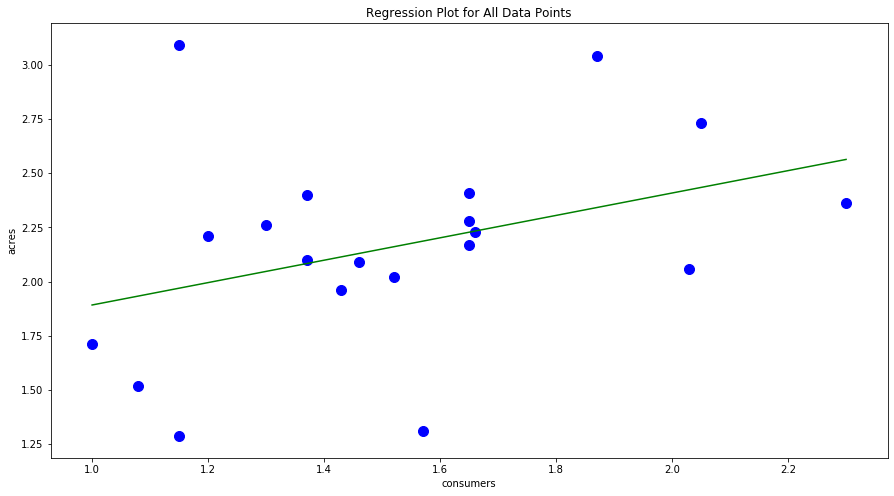

In [3]:
#Define relevant variables for our Analysis
x = df.consumers
y = df.acres
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
beta = sum((x- x_mean)*(y-y_mean))/(sum((x-x_mean)**2))
alpha = y_mean-beta*x_mean
y_hat = alpha + beta*x
SE = np.sqrt(sum((y_hat-y_mean)**2)/(n-2))
RSS = sum((y-y_hat)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
R2 = RegSS/TSS

#Plot the Regression
plt.figure(figsize=(15,8))
plt.title('Regression Plot for All Data Points')
plt.xlabel('consumers')
plt.ylabel('acres')
plt.scatter(x,y,s=100,c='b',marker='o')
plt.plot(x,y_hat,'g-')
plt.show()

In [4]:
"""Now we do an analysis of the data without the 4th data point"""
df2 = df.drop(4,axis=0)
df2.head()

,consumers,acres
1,1.00,1.71
2,1.08,1.52
3,1.15,1.29
5,1.20,2.21
6,1.30,2.26


/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


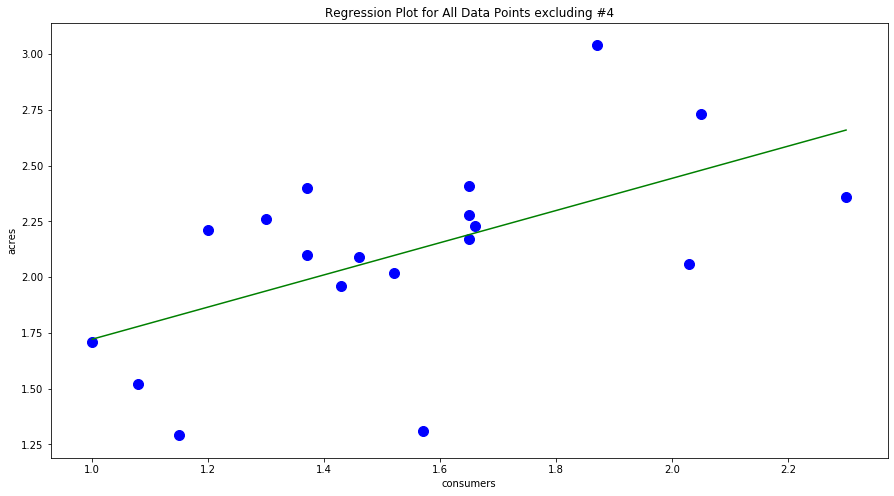

In [5]:
#Define relevant variables for our Analysis of Data w/o 4th entry
x1 = df2.consumers
y1 = df2.acres
n1 = len(x1)
x1_mean = np.mean(x1)
y1_mean = np.mean(y1)
beta1 = sum((x1- x1_mean)*(y1-y1_mean)) / (sum((x1-x1_mean)**2))
alpha1 = y1_mean - beta1*x1_mean
y1_hat = alpha1 + beta1*x1
SE1 = np.sqrt(sum((y1_hat-y1_mean)**2) / (n1-2))
RSS1 = sum((y1-y1_hat)**2)
TSS1 = sum((y1-y1_mean)**2)
RegSS1 = TSS1 - RSS1
R2_1 = RegSS1 / TSS1

#Plot the Regression
plt.figure(figsize=(15,8))
plt.title('Regression Plot for All Data Points excluding #4')
plt.xlabel('consumers')
plt.ylabel('acres')
plt.scatter(x1,y1,s=100,c='b',marker='o')
plt.plot(x1,y1_hat,'g-')
plt.show()

`Do the results change if the fourth household is deleted?`

In [6]:
print('The Alpha for all data is {}'.format(alpha))
print('The Alpha for data excluding 4th entry is {}'.format(alpha1))
print('\nThe Beta for this data is {}'.format(beta))
print('The Beta for data excluding 4th entry is {}'.format(beta1))
print('\nThe Standard Error for this data is {}'.format(SE))
print('The Standard Error for data excluding 4th entry is {}'.format(SE1))
print('\nThe R-Squared for this data is {}'.format(R2))
print('The R-Squared for data excluding 4th entry is {}'.format(R2_1))

The Alpha for all data is 1.3756445484797928
The Alpha for data excluding 4th entry is 1.0000039779982317

The Beta for this data is 0.5163200600920598
The Beta for data excluding 4th entry is 0.7215941459581575

The Standard Error for this data is 0.18415495900126555
The Standard Error for data excluding 4th entry is 0.2562223171905366

The R-Squared for this data is 0.14111752046957265
The R-Squared for data excluding 4th entry is 0.3264051395667763


We see that indeed, the removal of the entry changes the parameters of the model, there are changes to Alpha and Beta and a slight change in the Standard Error. Most strinking is the doubling of the R-Squared statistic withouth the 4th entry.

`Does either regression do a good job of summarizing the relationship between Acres/Gardener and Consumers/Gardener?`

# D 6.2

`Find the standard errors of the least-squares intercept and slope.` 

In [7]:
#For all Data points
SE_slope = SE / np.sqrt(sum((x-x_mean)**2))
SE_intercept = SE*np.sqrt(sum(x**2)) / np.sqrt(n*sum((x-x_mean)**2))

print("Standard Error of the Slope of Regression Line for all data points = {}".format(SE_slope))
print("Standard Error of the Y Intercept for all data points = {}".format(SE_intercept))

Standard Error of the Slope of Regression Line for all data points = 0.12169780525124706
Standard Error of the Y Intercept for all data points = 0.18986495788203298


`Can we conclude that the population slope is greater than zero? `

In [8]:
print('Yes, we can conclude the Slope will be positive; observe the slope is = {} and we have calculated the SE Error is = {}. Thus, the minimum slope will be greater than zero at {}'.format(beta,SE_slope,beta-SE_slope))

Yes, we can conclude the Slope will be positive; observe the slope is = 0.5163200600920598 and we have calculated the SE Error is = 0.12169780525124706. Thus, the minimum slope will be greater than zero at 0.3946222548408127


`Can we conclude that the intercept is greater than zero?` 

In [9]:
print('Yes, we can conclude the intercept will be positive; observe the intercept is = {} and we have calculated the SE of the Intercept is = {}. Thus, the minimum intercept will be greater than zero at {}'.format(alpha,SE_intercept,alpha-SE_intercept))

Yes, we can conclude the intercept will be positive; observe the intercept is = 1.3756445484797928 and we have calculated the SE of the Intercept is = 0.18986495788203298. Thus, the minimum intercept will be greater than zero at 1.1857795905977597


`Repeat these computations omitting the fourth household.`

In [10]:
#For all data points excluding the 4th entry
SE_slope1 = SE1 / np.sqrt(sum((x1-x1_mean)**2))
SE_intercept1 = SE1*np.sqrt(sum(x1**2)) / np.sqrt(n1*sum((x1-x1_mean)**2))

print("Standard Error of the Slope of Regression Line for all data points  w/o 4th entry= {}".format(SE_slope1))
print("Standard Error of the Y Intercept for all data points w/o 4th entry = {}".format(SE_intercept1))

Standard Error of the Slope of Regression Line for all data points  w/o 4th entry= 0.17501228721252066
Standard Error of the Y Intercept for all data points w/o 4th entry = 0.27630450007322


# 4

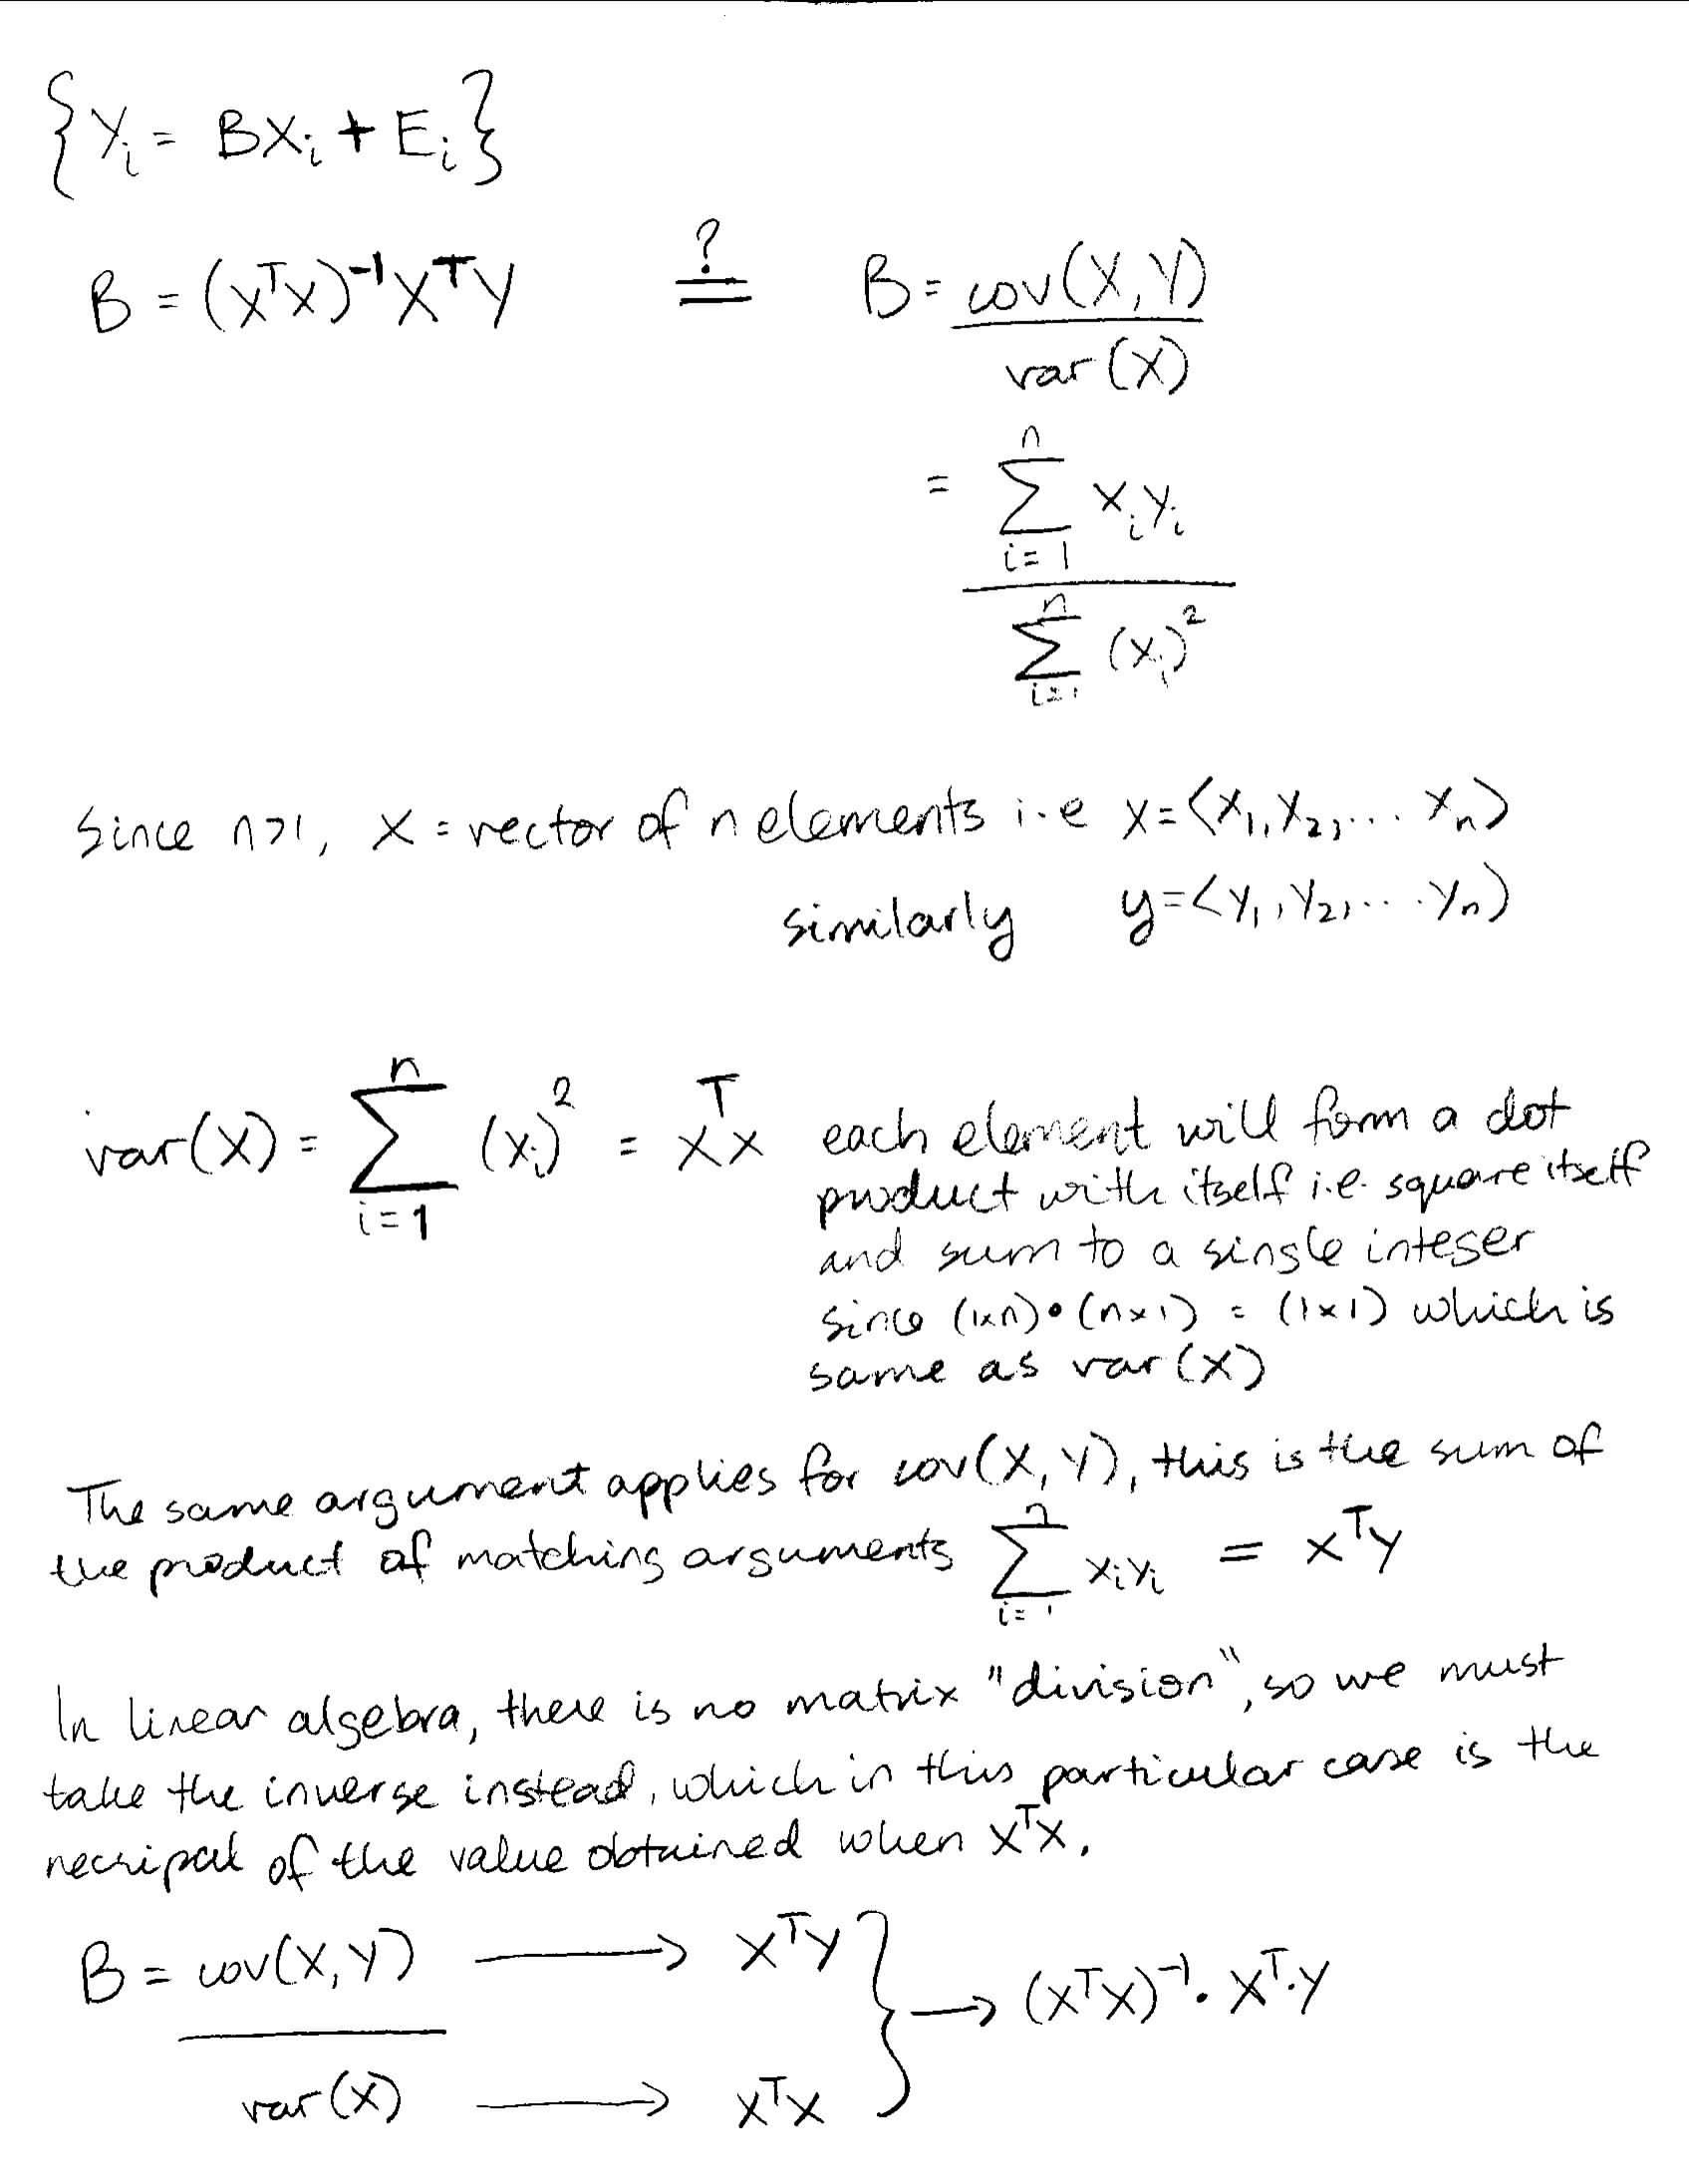

In [11]:
Image("4.png",width=600, height=800)